In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = Image.open('../data/train_images/train_image_png_1.png')
im.show()

In [3]:
def rgb2gray(frame):
        return np.dot(frame[..., :3], [0.2989, 0.5870, 0.1140])

In [4]:
def whiten_and_filter(frame, r):

    def cart2pol(x, y):
        rho = np.sqrt(x ** 2 + y ** 2)
        phi = np.arctan2(y, x)

        return rho, phi

    h, w = frame.shape
    imf = np.fft.fftshift(np.fft.fft2(frame))
    fx, fy = np.meshgrid(np.arange(-w / 2, w / 2), np.arange(-h / 2, h / 2))
    rho, theta = cart2pol(fx, fy)
    filtf = rho * np.exp(-0.5 * (rho / (0.7 * r / 2)) ** 2)
    imwf = filtf * imf
    imw = np.real(np.fft.ifft2(np.fft.fftshift(imwf)))

    return imw

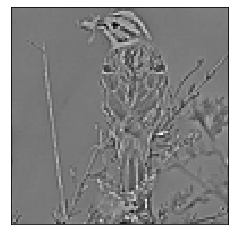

In [38]:
im_array = np.array(im)

frame = rgb2gray(im_array)
frame = whiten_and_filter(frame, 200)

fig = plt.figure()
plt.imshow(frame, cmap='gray')

frame_norm = frame / np.max(abs(frame))
plt.imshow(frame_norm, cmap='gray')
ax = fig.gca()
ax.set_xticks([])
ax.set_yticks([])

fig.savefig('../experiments/figures/sample_img.png', bounding_box=0.35)

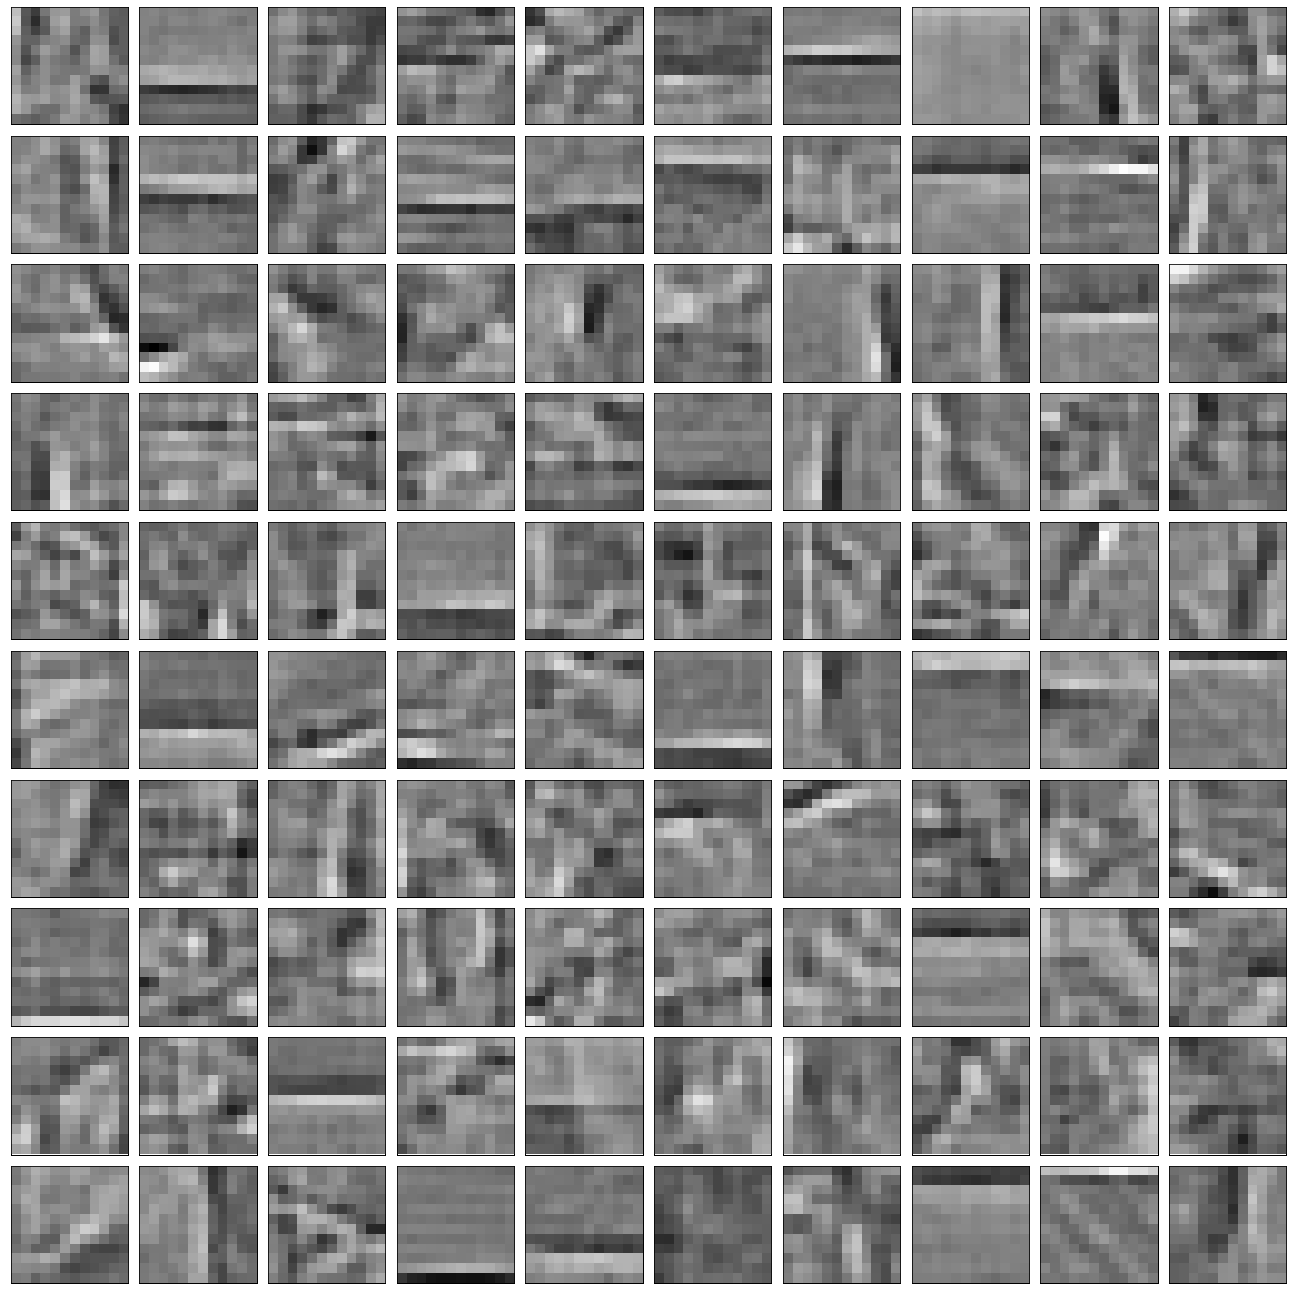

In [50]:
from sklearn.feature_extraction.image import extract_patches_2d

n = 100
dim = 12

patches = extract_patches_2d(frame, patch_size=(dim, dim), max_patches=n)
w = np.zeros((dim**2, n))

for i, p in enumerate(patches):
    w[:,i] = p.flatten()
# fig, axes = plt.subplots(5,5) 
# for i, ax in enumerate(axes.flatten()):
#     ax.imshow(patches[i], cmap='gray')
#     ax.label_outer()

# plt.show()

from plotting_functions import *

# plot_RFs(w, name='img_patches', save=True, dir='../experiments/figures/', scaling=True)
with open('../experiments/weights_44000.npy', 'rb') as f:
    a = np.load(f)

plot_RFs(a, name='RF_no_rec_scaled', save=True, scaling=True, dir='../experiments/figures/')


In [7]:
%load_ext autoreload
%autoreload 2
sys.path.append('../')
from inputs import *

inp = ImagePatchInput('inp', path='../data/train_images/', patch_size=(12,12), r=100)

In [8]:
inp.initialise(1000, 1)
plt.imshow(inp.I[0,:,:], cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: '../data/train_images/test_image_png_1.png'